Сгенерируем 1797 рукописных цифр (которые задаются вектором из 64 чисел) и реализуем метод KNN для определения, к какому классу относится цифра (всего получается 10 классов).

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


<class 'sklearn.utils.Bunch'>


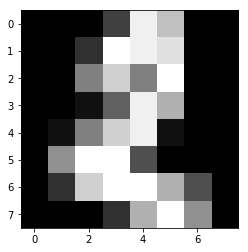

2


In [66]:
data = load_digits() #генерируем 1797 рукописных цифр
print(type(data))
X, y = data.data, data.target # каждая цифра задается массивом из 8*8=64 чисел

X_train, X_test, y_train, y_test = train_test_split(X, y)

# пример
fig = plt.figure(figsize=(5,4))
plt.imshow(X[2].reshape((8,8)), cmap='gray')
plt.show()
print(y[2])

In [31]:
class KNN():
    def __init__(self):
        pass

    def fit(self, X, y):
        self.data = X
        self.targets = y

    def euclidean_distance(self, X): 
        # если цифра одна
        if X.ndim == 1:
            l2 = np.sqrt(np.sum((self.data - X)**2, axis=1))

        # если несколько
        if X.ndim == 2:
            n_samples, _ = X.shape
            l2 = [np.sqrt(np.sum((self.data - X[i])**2, axis=1)) for i in range(n_samples)]

        return np.array(l2)

    def predict(self, X, k=1):

        # рассчитываем расстояния до элементов обучающей выборки
        dists = self.euclidean_distance(X)

        # находим k ближайших соседей и их классы
        if X.ndim == 1:
            if k == 1:
                nn = np.argmin(dists)
                return self.targets[nn]
            else:
                knn = np.argsort(dists)[:k] # находим k ближайших соседей
                y_knn = self.targets[knn]
                max_vote = max(y_knn, key=list(y_knn).count) # класс самого часто встречающегося объекта
                return max_vote

        if X.ndim == 2:
            knn = np.argsort(dists)[:, :k]
            y_knn = self.targets[knn]
            if k == 1:
                return y_knn.T
            else:
                n_samples, _ = X.shape
                max_votes = [max(y_knn[i], key=list(y_knn[i]).count) for i in range(n_samples)]
                return max_votes

In [32]:
knn = KNN()
knn.fit(X_train, y_train)

Тест при k=2
Результат алгоритма: 6
Реальное значение: 6


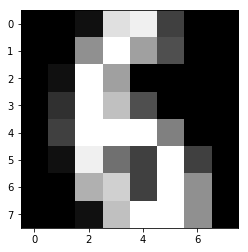

Тест 5 цифр при k=1
Результат алгоритма : [[8 2 6 7 2]]
Реальные значения: [8 2 6 7 2]


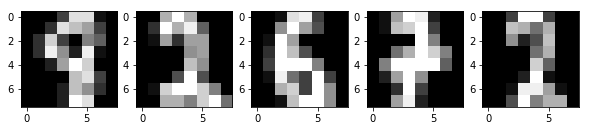

In [61]:
print("Тест при k=2")
print(f"Результат алгоритма: {knn.predict(X_test[3], k=2)}")
print(f"Реальное значение: {y_test[3]}")
fig = plt.figure(figsize=(5,4))
plt.imshow(X_test[3].reshape((8,8)), cmap='gray')
plt.show()

print("Тест 5 цифр при k=1")
print(f"Результат алгоритма : {knn.predict(X_test[1:6], k=1)}")
print(f"Реальные значения: {y_test[1:6]}")

fig = plt.figure(figsize=(10,8))
for i in range(1,6):
    ax = fig.add_subplot(2, 5, i)
    plt.imshow(X_test[i].reshape((8,8)), cmap='gray')

Посмотрим на точность классификации при разных k

In [46]:
data_test = load_digits()
X_data_test, y_data_test = data.data, data.target
accuracy = []
for i in range (20):
    k = i+1
    y_p_test = knn.predict(X_data_test, k=k)
    if (k==1):
        test_acc= np.sum(y_p_test[0] == y_data_test)/len(y_p_test[0]) * 100
    else:
        test_acc= np.sum(y_p_test == y_data_test)/len(y_p_test) * 100
    accuracy.append(test_acc)
    print(f"Точность при k = {k} : {format(test_acc)}") 


Точность при k = 1 : 99.8330550918197
Точность при k = 2 : 99.8330550918197
Точность при k = 3 : 99.10962715637173
Точность при k = 4 : 99.33222036727881
Точность при k = 5 : 98.8313856427379
Точность при k = 6 : 99.10962715637173
Точность при k = 7 : 98.60879243183082
Точность при k = 8 : 98.72008903728437
Точность при k = 9 : 98.55314412910407
Точность при k = 10 : 98.60879243183082
Точность при k = 11 : 98.27490261547022
Точность при k = 12 : 98.38619922092377
Точность при k = 13 : 98.05230940456316
Точность при k = 14 : 98.1636060100167
Точность при k = 15 : 98.1636060100167
Точность при k = 16 : 98.10795770728993
Точность при k = 17 : 98.05230940456316
Точность при k = 18 : 97.8297161936561
Точность при k = 19 : 97.77406789092933
Точность при k = 20 : 97.71841958820256


Text(0,0.5,'Точность')

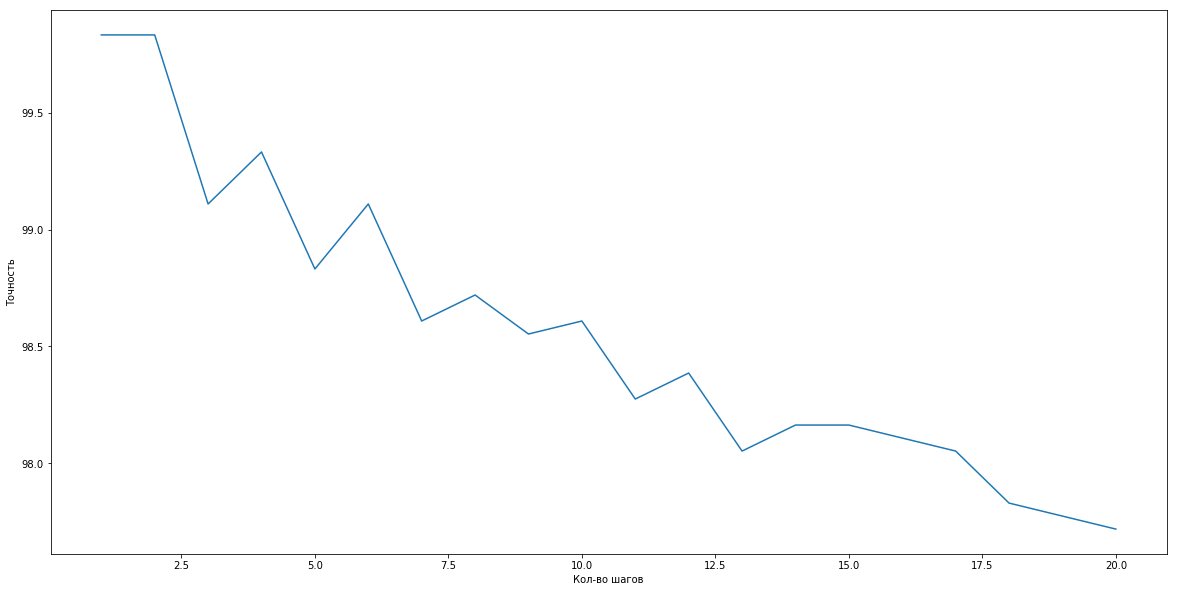

In [55]:
plt.figure(figsize=(20, 10))
plt.plot(range(1,len(accuracy)+1), accuracy)

plt.xlabel('Кол-во шагов')
plt.ylabel('Точность')

Точность убывает с ростом k